# Comparison of ML Classification Algorithms

Classifiers are a type of supervised machine learning based on... It's goal is to be able to take a certain value and classify it as belonging to one class or another based on its features. Different classifiers perform better than other on different types of data. This project will quantify and visualize how well some of these classifiers can work.

In this project I will be comparing six classifiers:
 - Naive Bayes
 - Logistic Regression
 - Quadratic Discriminant Analysis
 - Support Vector Machine
 - Decision Tree Classifier
 - K Nearest Neighbors

 This will be done with synthetic data taking on different shapes, each being created with a purpose to suit a specific model's classifiying ability.

First, all necessary libraries will be imported.

In [215]:
# importing necessary libraries

from sklearn.datasets import make_moons, make_circles, make_blobs

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


## Creation of Synthetic Data

Now, four different types of synthetic data will be created.

### Example 1: Two well separated blob classes, shows all classifiers work well.

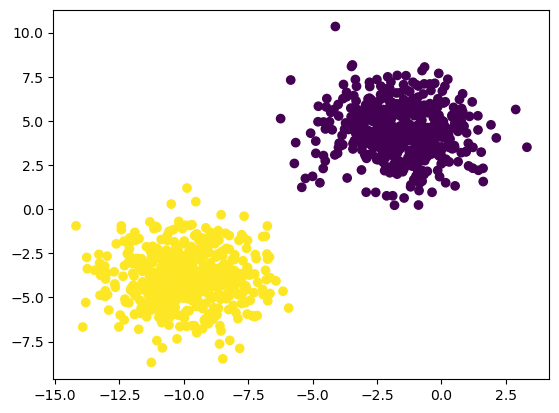

In [216]:
X1, y1 = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=1, cluster_std=1.5)
plt.scatter(X1[:,0], X1[:,1], c=y1)

### Example 2: QDA should perform really well. SVM, Decision Tree, KNN should perform well, and linear should perform poorly.

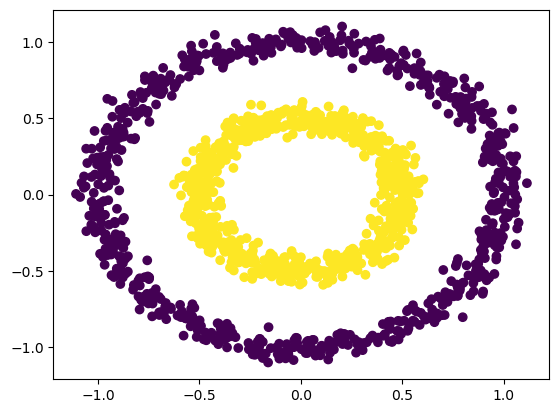

In [217]:
X2, y2 = make_circles(n_samples=1500, random_state=1, noise=0.05, factor=0.5)
plt.scatter(X2[:,0], X2[:,1], c = y2)


### Example 3: Decision Tree and KNN should overfit (testing error is large). Linear Regression does better.

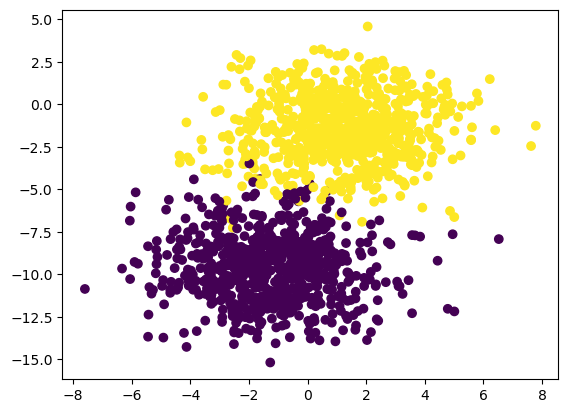

In [218]:
X3, y3 = make_blobs(n_samples=1500, n_features= 2, centers = 2, random_state=2, cluster_std = 1.9 )
plt.scatter(X3[:,0], X3[:,1], c = y3)

### Example 4: SVM and KNN do better than the other classifiers.

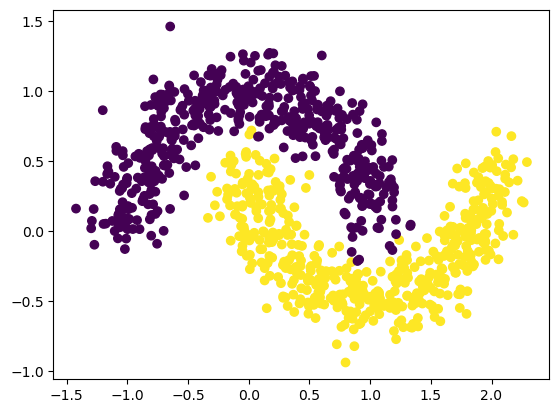

In [219]:
X4, y4 = make_moons(random_state=1, n_samples=1000, noise=0.14)
plt.scatter(X4[:,0], X4[:,1], c = y4)

## Classifiers

Now that the synthetic data has been created, the next step is split it for training and testing, and then building the pipline of classifiers.

### Split data into training and testing

In [220]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3, random_state=1)
x3_train, x3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.3, random_state=1)
x4_train, x4_test, y4_train, y4_test = train_test_split(X4,y4, test_size=0.3, random_state=1)

A dictionary containing the classifiers and their names is created.

In [221]:
classifiers = {"Naive Bayes":BernoulliNB(),
               "Logistic Regression": LogisticRegression(),
               "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(), 
               "Support Vector Machine": SVC(kernel='rbf'),
               "Decision Tree Classifier": DecisionTreeClassifier(), 
               "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=1)}

### Comparing classifiers for data 1

Here, the first synthetic data set is applied to all classifiers. All classifiers should be able to perform well on it.

Naive Bayes _______________________________________ 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       151
           1       1.00      0.99      0.99       149

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300
 
 Training Score: 0.9985714285714286 
 Testing Score: 0.9933333333333333 

Logistic Regression _______________________________________ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       149

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300
 
 Training Score: 1.0 
 Testing Score: 1.0 



Quadratic Discriminant Analysis _______________________________________ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       149

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300
 
 Training Score: 1.0 
 Testing Score: 1.0 

Support Vector Machine _______________________________________ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       149

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300
 
 Training Score: 1.0 
 Testing Score: 1.0 

Decision Tree Classifier _______________________________________ 
               precision    recall  f1-score   supp

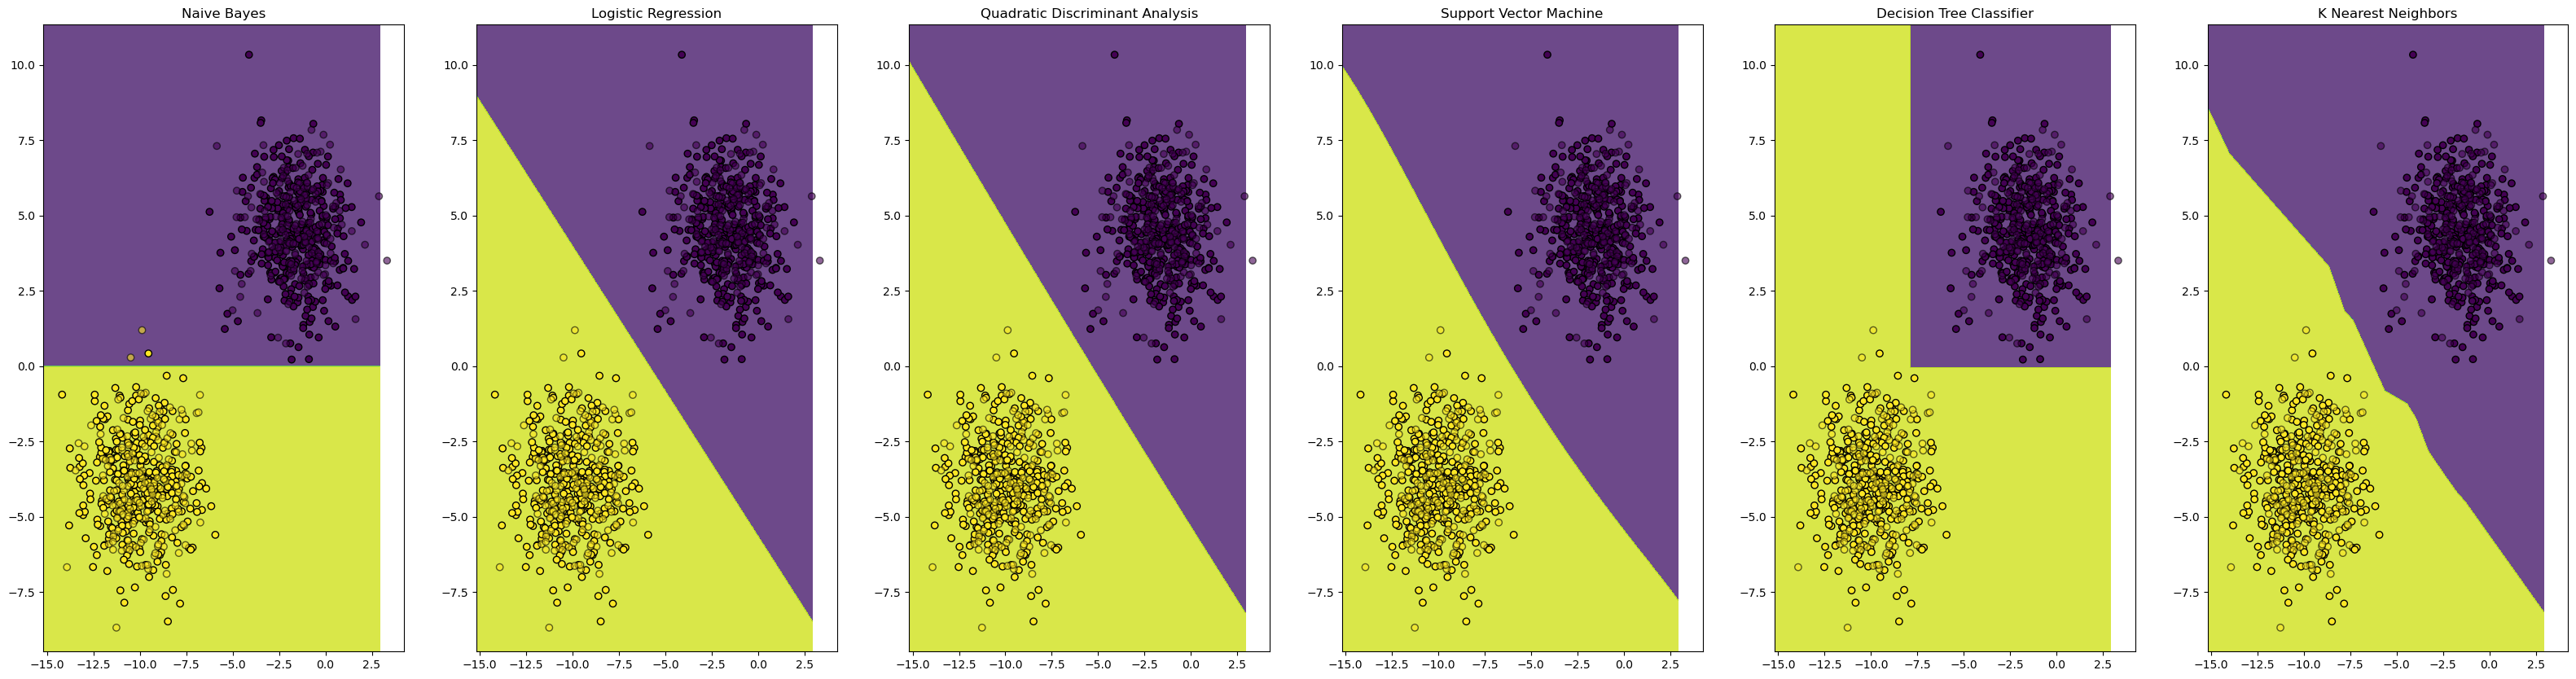

In [222]:
# defining the range for the meshgrid
x_min, x_max = x1_train[:, 0].min() - 1, x1_train[:, 0].max() + 1
y_min, y_max = x1_train[:, 1].min() - 1, x1_train[:, 1].max() + 1

# create a meshgrid
xv, yv = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# create the figure
fig, axes = plt.subplots(1, len(classifiers), figsize=(40, 10))


for (name, classifier), ax in zip(classifiers.items(), axes):

    # fit and predict
    classifier.fit(x1_train, y1_train)
    y_pred = classifier.predict(x1_test)
    
    # get the train and test scores
    train_score = classifier.score(x1_train, y1_train)
    val_score = classifier.score(x1_test, y1_test)

    report = classification_report(y1_test, y_pred)

    print(f"{name}",
          "_______________________________________",
          "\n",
          report,
          "\n",
          "Training Score:",
          train_score,
          "\n",
          "Testing Score:",
          val_score,
          "\n")

    # to plot decision boundaries
    Z = classifier.predict(np.c_[xv.ravel(), yv.ravel()])
    Z = Z.reshape(xv.shape)
    ax.contourf(xv, yv, Z, alpha=0.8)

    # to plot points
    ax.scatter(x1_train[:, 0], x1_train[:, 1], c=y1_train, edgecolors="k")
    ax.scatter(x1_test[:, 0], x1_test[:, 1], c=y1_test, alpha=0.6, edgecolors="k")
    ax.set_title(name)

plt.show()

The results show that every model was able to create a perfect classification, as the classification report for every model has values of all 1.0 for precision, recall, and f1-score, except for Naive Bayes which contained some values of 0.99. This is expected as the two blobs are very clearly linearly separated and have no points in one class that mix with the points of another class, or are arranged in a strange pattern.

### Comparing classifiers for data 2

For this synthetic data, quadratic discriminant analysis should perform really good. SVM, Decision Tree, KNN should perform well, and logistic regression should perform poorly.

Naive Bayes _______________________________________ 
               precision    recall  f1-score   support

           0       0.50      0.24      0.33       227
           1       0.49      0.75      0.59       223

    accuracy                           0.49       450
   macro avg       0.49      0.50      0.46       450
weighted avg       0.49      0.49      0.46       450
 
 Training Score: 0.5028571428571429 
 Testing Score: 0.49333333333333335 

Logistic Regression _______________________________________ 
               precision    recall  f1-score   support

           0       0.57      0.40      0.47       227
           1       0.53      0.70      0.60       223

    accuracy                           0.54       450
   macro avg       0.55      0.55      0.53       450
weighted avg       0.55      0.54      0.53       450
 
 Training Score: 0.5647619047619048 
 Testing Score: 0.5444444444444444 

Quadratic Discriminant Analysis _______________________________________ 
      

Decision Tree Classifier _______________________________________ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       223

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450
 
 Training Score: 1.0 
 Testing Score: 1.0 

K Nearest Neighbors _______________________________________ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       223

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450
 
 Training Score: 1.0 
 Testing Score: 1.0 



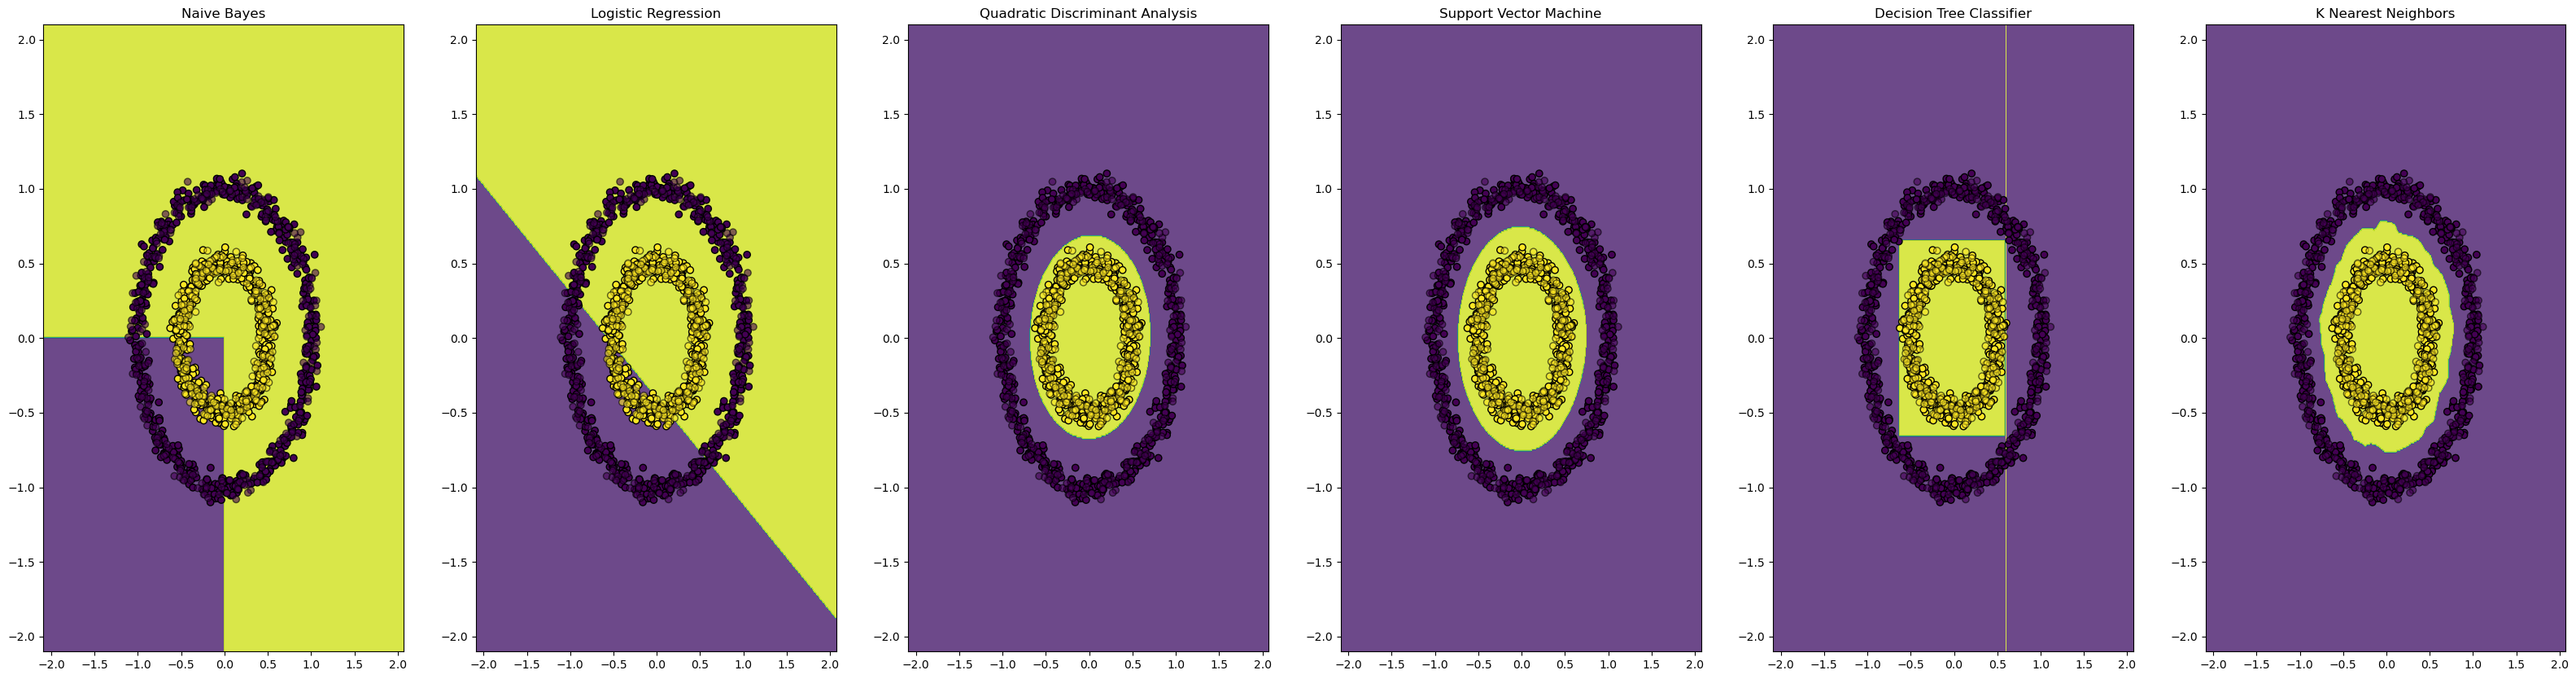

In [223]:
# defining the range for the meshgrid
x_min, x_max = x2_train[:, 0].min() - 1, x2_train[:, 0].max() + 1
y_min, y_max = x2_train[:, 1].min() - 1, x2_train[:, 1].max() + 1

# create a meshgrid
xv, yv = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# create the figure
fig, axes = plt.subplots(1, len(classifiers), figsize=(40, 10))


for (name, classifier), ax in zip(classifiers.items(), axes):

    # fit and predict
    classifier.fit(x2_train, y2_train)
    y_pred = classifier.predict(x2_test)
    
    # get the train and test scores
    train_score = classifier.score(x2_train, y2_train)
    val_score = classifier.score(x2_test, y2_test)

    report = classification_report(y2_test, y_pred)

    print(f"{name}",
          "_______________________________________",
          "\n",
          report,
          "\n",
          "Training Score:",
          train_score,
          "\n",
          "Testing Score:",
          val_score,
          "\n")

    # to plot decision boundaries
    Z = classifier.predict(np.c_[xv.ravel(), yv.ravel()])
    Z = Z.reshape(xv.shape)
    ax.contourf(xv, yv, Z, alpha=0.8)

    # to plot points
    ax.scatter(x2_train[:, 0], x2_train[:, 1], c=y2_train, edgecolors="k")
    ax.scatter(x2_test[:, 0], x2_test[:, 1], c=y2_test, alpha=0.6, edgecolors="k")
    ax.set_title(name)

plt.show()

The resulting report shows what we expected. Naive Bayes and Logistic Regression performed poorly (both with a precision of ~0.5, essentially random guessing) on this circular data because it is not linearly separable. However, other classifiers like KNN, decision tree, SVM, and QDA performed incredibly well, correctly guessing a class with a precision of  1.00. The decision boundary shows how Naive Bayes and Logistic Regression could only separate the classes using lines, while the others could create different shapes around the data.

### Comparing classifiers for data 3

For this synthetic data, Decision Tree and KNN should overfit (testing error is large), and Linear Regression should do better.

Naive Bayes _______________________________________ 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       222
           1       0.76      0.77      0.76       228

    accuracy                           0.76       450
   macro avg       0.76      0.76      0.76       450
weighted avg       0.76      0.76      0.76       450
 
 Training Score: 0.7828571428571428 
 Testing Score: 0.7577777777777778 

Logistic Regression _______________________________________ 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       222
           1       0.99      0.99      0.99       228

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450
 
 Training Score: 0.9895238095238095 
 Testing Score: 0.9911111111111112 

Quadratic Discriminant Analysis _______________________________________ 
       

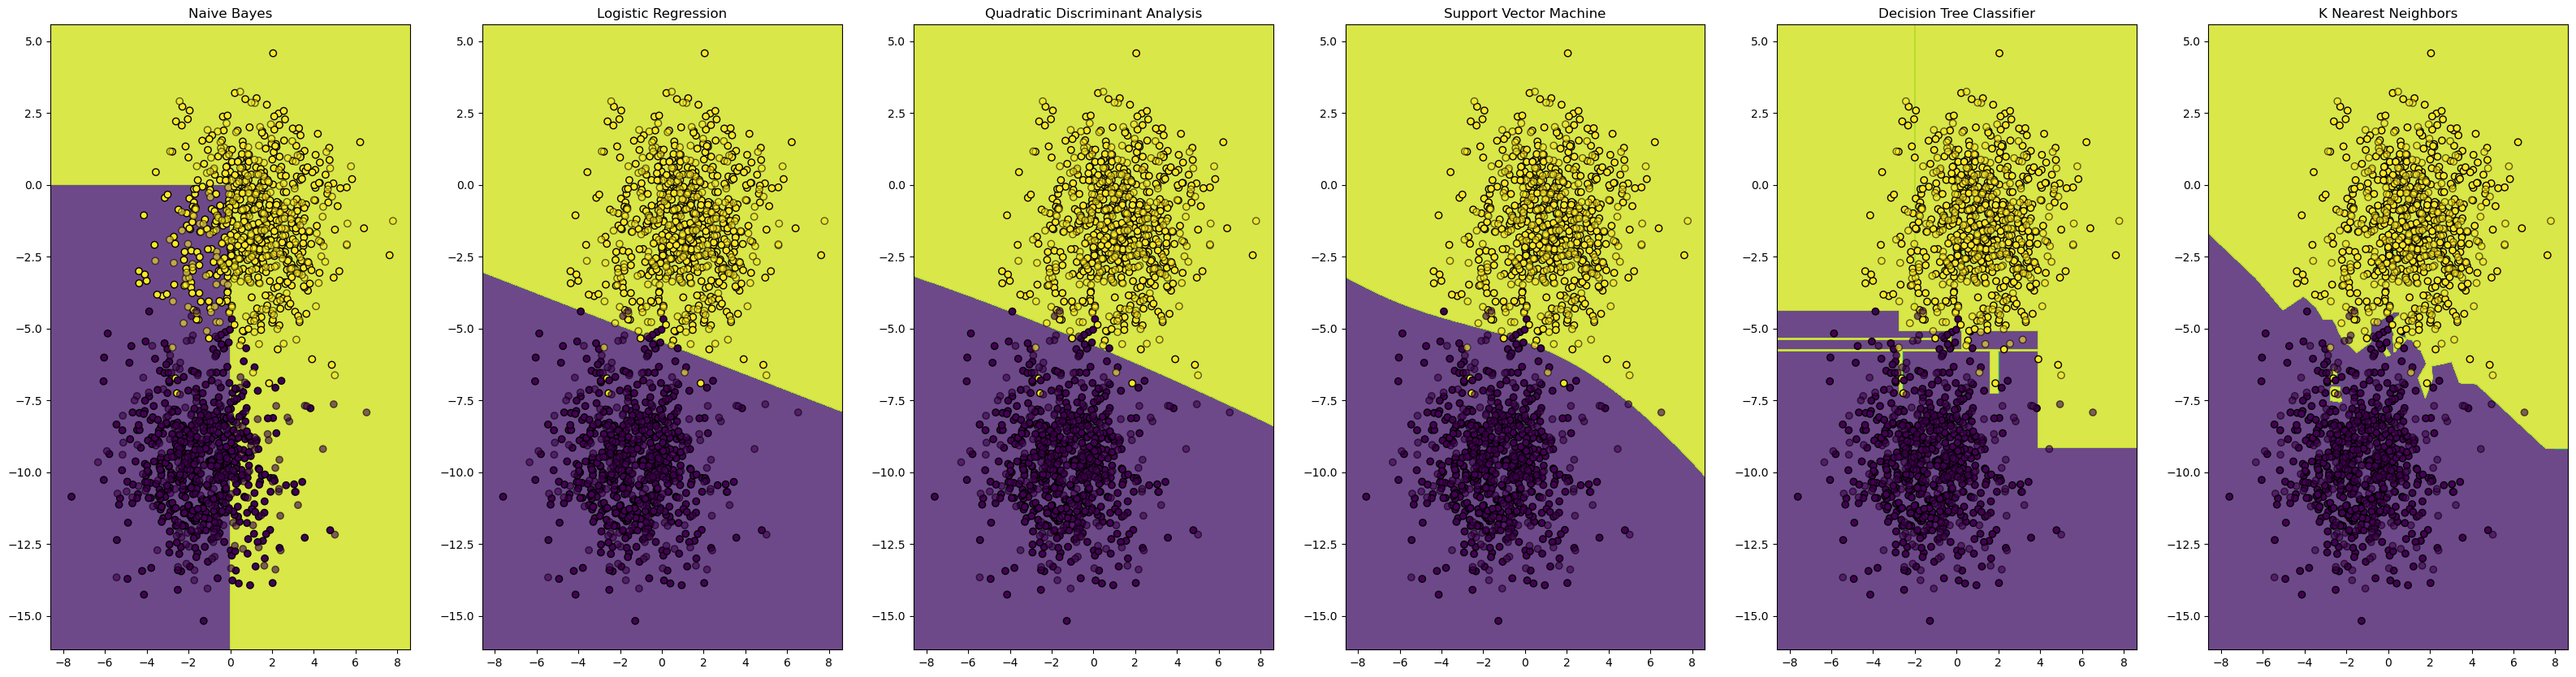

In [224]:
# defining the range for the meshgrid
x_min, x_max = x3_train[:, 0].min() - 1, x3_train[:, 0].max() + 1
y_min, y_max = x3_train[:, 1].min() - 1, x3_train[:, 1].max() + 1

# create a meshgrid
xv, yv = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# create the figure
fig, axes = plt.subplots(1, len(classifiers), figsize=(40, 10))


for (name, classifier), ax in zip(classifiers.items(), axes):

    # fit and predict
    classifier.fit(x3_train, y3_train)
    y_pred = classifier.predict(x3_test)
    
    # get the train and test scores
    train_score = classifier.score(x3_train, y3_train)
    val_score = classifier.score(x3_test, y3_test)

    report = classification_report(y3_test, y_pred)

    print(f"{name}",
          "_______________________________________",
          "\n",
          report,
          "\n",
          "Training Score:",
          train_score,
          "\n",
          "Testing Score:",
          val_score,
          "\n")

    # to plot decision boundaries
    Z = classifier.predict(np.c_[xv.ravel(), yv.ravel()])
    Z = Z.reshape(xv.shape)
    ax.contourf(xv, yv, Z, alpha=0.8)

    # to plot points
    ax.scatter(x3_train[:, 0], x3_train[:, 1], c=y3_train, edgecolors="k")
    ax.scatter(x3_test[:, 0], x3_test[:, 1], c=y3_test, alpha=0.6, edgecolors="k")
    ax.set_title(name)

plt.show()

Although these are still two well separated blob classes, the distance between some points varies, and some points often intermingle with points of other classes. The classification report and the decision boundaries show how Decision Tree and KNN tend to overfit on this type of data. The report indicates that Decision Tree and KNN have the largest difference between the training score and testing score, indicating that they have overfit the training data and are not as good at generalizing for new data in comparison to the Logistic Regression. The decision boundary plots do a good job at visualizing how closely the Decision Tree and KNN have overfit the data.

### Comparing classifiers for data 4

For this synthetic data, SVM and KNN should do better than the other classifiers.

Naive Bayes _______________________________________ 
               precision    recall  f1-score   support

           0       0.75      0.98      0.85       154
           1       0.97      0.65      0.78       146

    accuracy                           0.82       300
   macro avg       0.86      0.82      0.81       300
weighted avg       0.86      0.82      0.81       300
 
 Training Score: 0.8171428571428572 
 Testing Score: 0.82 

Logistic Regression _______________________________________ 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       154
           1       0.90      0.86      0.88       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300
 
 Training Score: 0.87 
 Testing Score: 0.8866666666666667 

Quadratic Discriminant Analysis _______________________________________ 
               precision    recall 

Support Vector Machine _______________________________________ 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       154
           1       0.99      0.98      0.98       146

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300
 
 Training Score: 0.99 
 Testing Score: 0.9833333333333333 

Decision Tree Classifier _______________________________________ 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       154
           1       1.00      0.98      0.99       146

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300
 
 Training Score: 1.0 
 Testing Score: 0.99 

K Nearest Neighbors _______________________________________ 
               precision    recall  f1-score  

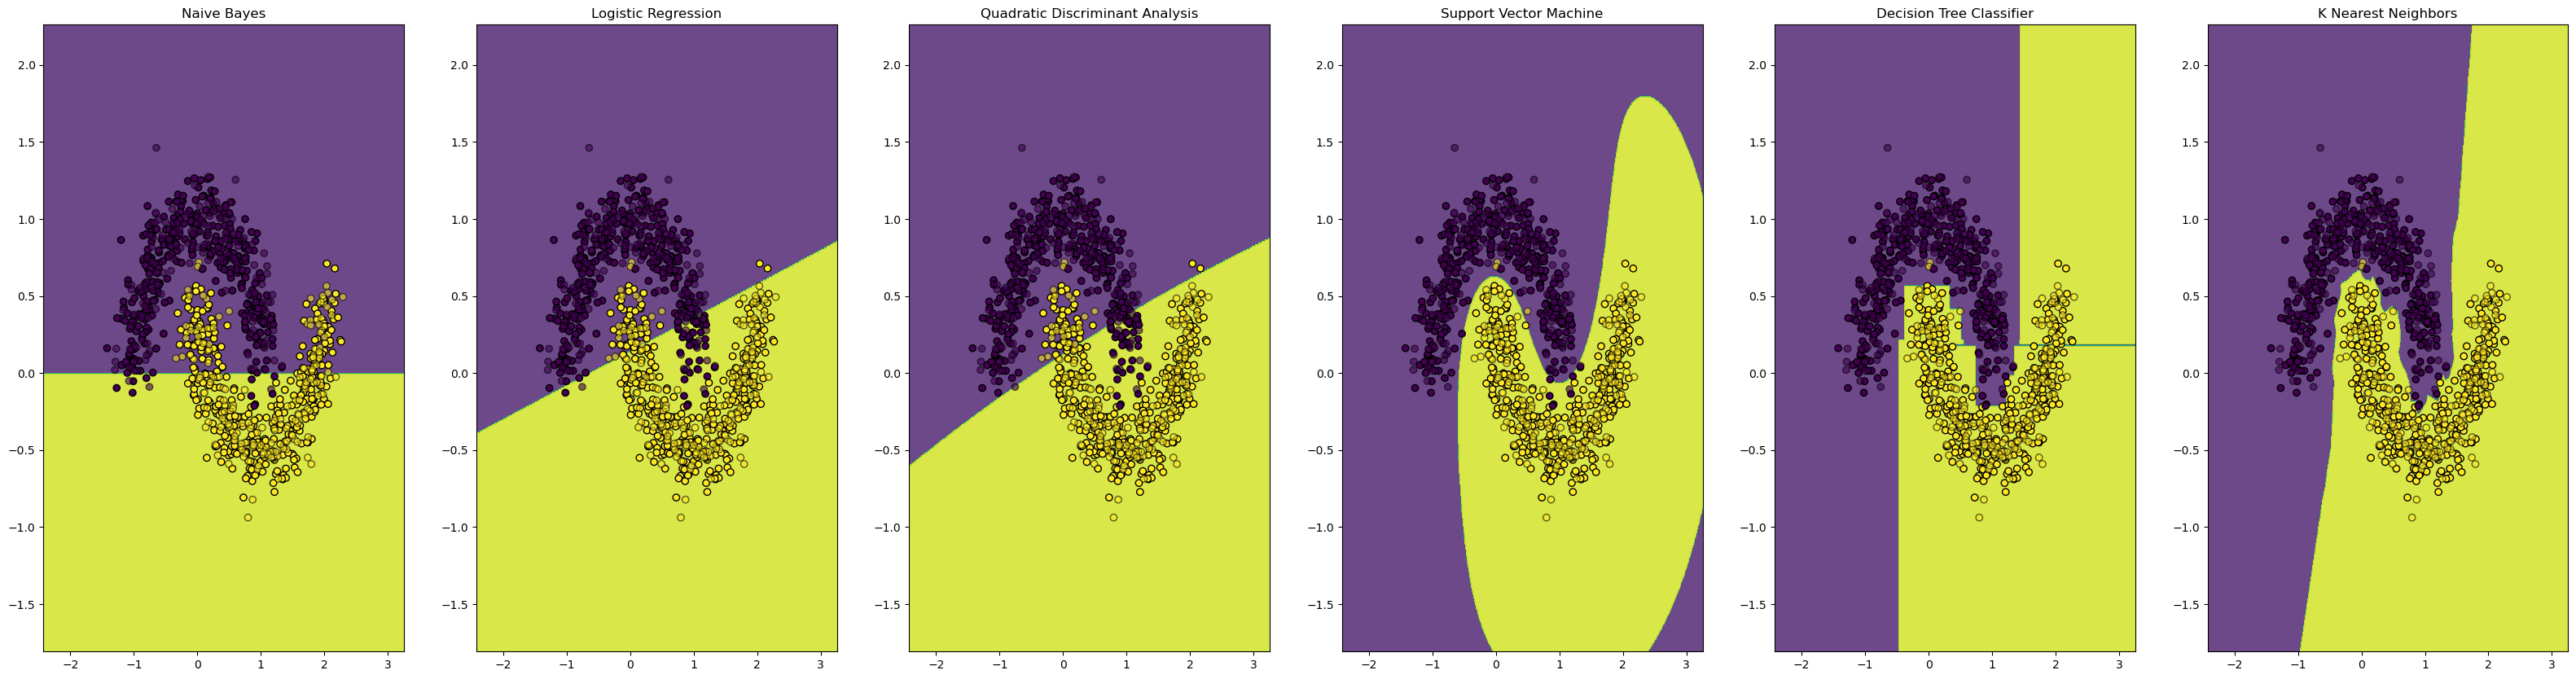

In [225]:
# defining the range for the meshgrid
x_min, x_max = x4_train[:, 0].min() - 1, x4_train[:, 0].max() + 1
y_min, y_max = x4_train[:, 1].min() - 1, x4_train[:, 1].max() + 1

# create a meshgrid
xv, yv = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# create the figure
fig, axes = plt.subplots(1, len(classifiers), figsize=(40, 10))


for (name, classifier), ax in zip(classifiers.items(), axes):

    # fit and predict
    classifier.fit(x4_train, y4_train)
    y_pred = classifier.predict(x4_test)
    
    # get the train and test scores
    train_score = classifier.score(x4_train, y4_train)
    val_score = classifier.score(x4_test, y4_test)

    report = classification_report(y4_test, y_pred)

    print(f"{name}",
          "_______________________________________",
          "\n",
          report,
          "\n",
          "Training Score:",
          train_score,
          "\n",
          "Testing Score:",
          val_score,
          "\n")

    # to plot decision boundaries
    Z = classifier.predict(np.c_[xv.ravel(), yv.ravel()])
    Z = Z.reshape(xv.shape)
    ax.contourf(xv, yv, Z, alpha=0.8)

    # to plot points
    ax.scatter(x4_train[:, 0], x4_train[:, 1], c=y4_train, edgecolors="k")
    ax.scatter(x4_test[:, 0], x4_test[:, 1], c=y4_test, alpha=0.6, edgecolors="k")
    ax.set_title(name)

plt.show()

It can be seen that KNN and SVM have the highest testing score, 0.993 and 0.983, respectively. The other classifiers do not perform as well on this "moon" shaped data because it is not linearly separable, but KNN and SVM can classify data that is non-linear but has a clear margin and has homogenous areas with little noise or intermixing between classes. By looking at the decision boundaries, we can see that SVM, Decision tree, and KNN fit the data really well, with these last two possibly overfitting.

## Conclusion

This project has explored how there is no one perfect classifier, and that when selecting a classifier to use, the shape and distribution of the data should be carefully considered.


For linearly separable data, all models can perform perfectly, as seen in Data 1. However, if points are noisy and have a large standard deviation from the center, classifiers like Decision Tree and K-Nearest Neighbors can overfit the data and end up being worse at generalizing in comparison to simpler classifiers like Logistic Regression.

For non-linear data, such as circles or curves in Data 2, classifiers like SVM, Decision Trees, and KNNs can perform well and be good at generalizing given that there isn't much noise and classes have enough separation between them.

It's also important to consider that things like the amount of dimensions, and samples available to train a classifier can also affect their ability to perform well. For example, decision trees tend to overfit when given few samples or highly complex data, as can be seen with Data 3 and Data 4. KNN is sensitive to high dimensionality and can overfit on data that isn't cleanly separated and contains noise as seen in Data 3.